#                   COFFEE SHOP TRANSACTION DATASET


    My goal is to analyze the data given coming up with solutions for the given problems :
    1.Inventory Optimization
    2.Peak hours for stocking
    3.Customer retention/loyalty
    4.Revenue forecasting
    5.Pricing strategy
    6.Menu optimization


In [2]:
# MY DATA
import pandas as pd
import numpy as np
import os

url= r"C:/Users/laura/Desktop/Projects/Coffee-shop-transaction-project"
os.chdir(url)

Transaction= pd.read_csv("index_1.csv")
Transaction.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Data Cleaning

In [3]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [4]:
Transaction.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [5]:
Transaction.sum

<bound method DataFrame.sum of             date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
3631  2025-03-23  2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23  2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23  2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3634  2025-03-23  2025-03-23 15:47:28.723      card  ANON-0000-0000-1316   
3635  2025-03-23  2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money    coffee_name  
0     38.70          Latte 

In [6]:
Transaction.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [7]:
Transaction.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
Transaction

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


In [9]:
# Using content knowledge, i need to fill in or do away with the columns that have alot of null values, henceforth making it valuable or not

Transaction.isna().sum()/Transaction.isnull().count().sort_values() * 100

date           0.000000
datetime       0.000000
cash_type      0.000000
card           2.447745
money          0.000000
coffee_name    0.000000
dtype: float64

In [10]:
new_data= Transaction.drop(columns=['card'])
new_data
# The card type someone uses has no value or rather will not help in coming up with solutions for the above the problem s i need to solve.
# therefore i drop the comulmn

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte
...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,25.96,Americano


In [11]:
new_data['datetime'].str.split(' ', expand= True)

,0,1
0,2024-03-01,10:15:50.520
1,2024-03-01,12:19:22.539
2,2024-03-01,12:20:18.089
3,2024-03-01,13:46:33.006
4,2024-03-01,13:48:14.626
...,...,...
3631,2025-03-23,10:34:54.894
3632,2025-03-23,14:43:37.362
3633,2025-03-23,14:44:16.864
3634,2025-03-23,15:47:28.723


In [12]:
new_data[["date2","Time"]]=new_data['datetime'].str.split(' ', expand= True)
# I am splitting the datetime column so that it becomes clear with only time!

In [13]:
new_data.drop(columns=["datetime","date2"],inplace=True)
new_data

,date,cash_type,money,coffee_name,Time
0,2024-03-01,card,38.70,Latte,10:15:50.520
1,2024-03-01,card,38.70,Hot Chocolate,12:19:22.539
2,2024-03-01,card,38.70,Hot Chocolate,12:20:18.089
3,2024-03-01,card,28.90,Americano,13:46:33.006
4,2024-03-01,card,38.70,Latte,13:48:14.626
...,...,...,...,...,...
3631,2025-03-23,card,35.76,Cappuccino,10:34:54.894
3632,2025-03-23,card,35.76,Cocoa,14:43:37.362
3633,2025-03-23,card,35.76,Cocoa,14:44:16.864
3634,2025-03-23,card,25.96,Americano,15:47:28.723


# Data Analysis: Inventory Optimization

HINT: Popularity of a coffee type to avoid overstocking or understocking

In [14]:
#Starting with the first problem: Inventory optimization, i need to check out which coffe type are most popular so that the coffe shop will know which cofffe type should be most at stock and which one to understock
new_data['coffee_name'].value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

In [15]:
#Before making a rushed decision of understocking expresso , i need to know the exact time of the day and  which day of the week a certain kind is most preferred
coffee= new_data.set_index('coffee_name')
coffee


,date,cash_type,money,Time
coffee_name,,,,
Latte,2024-03-01,card,38.70,10:15:50.520
Hot Chocolate,2024-03-01,card,38.70,12:19:22.539
Hot Chocolate,2024-03-01,card,38.70,12:20:18.089
Americano,2024-03-01,card,28.90,13:46:33.006
Latte,2024-03-01,card,38.70,13:48:14.626
...,...,...,...,...
Cappuccino,2025-03-23,card,35.76,10:34:54.894
Cocoa,2025-03-23,card,35.76,14:43:37.362
Cocoa,2025-03-23,card,35.76,14:44:16.864


In [16]:
coffee.loc['Americano with Milk'].head(10)

,date,cash_type,money,Time
coffee_name,,,,
Americano with Milk,2024-03-01,card,33.8,15:39:47.726
Americano with Milk,2024-03-01,card,33.8,18:39:03.580
Americano with Milk,2024-03-01,card,33.8,19:23:15.887
Americano with Milk,2024-03-01,card,33.8,19:29:17.391
Americano with Milk,2024-03-02,card,33.8,10:41:41.249
Americano with Milk,2024-03-02,card,33.8,11:59:45.484
Americano with Milk,2024-03-02,card,33.8,16:37:24.475
Americano with Milk,2024-03-03,card,33.8,18:03:23.369
Americano with Milk,2024-03-03,card,33.8,18:04:27.946


In [17]:
new_data['money'].value_counts()
#i want to know the preferrable price and what exactly is the coffe type
# most people go for the $35.76

money
35.76    1014
32.82     490
25.96     459
30.86     389
27.92     334
37.72     273
23.02     208
38.70     128
28.90      93
21.06      59
33.80      51
18.12      36
40.00      32
39.00      18
24.00      14
30.00      11
29.00       8
35.00       8
34.00       7
25.00       4
Name: count, dtype: int64

In [18]:
price= new_data.set_index('money')
price

,date,cash_type,coffee_name,Time
money,,,,
38.70,2024-03-01,card,Latte,10:15:50.520
38.70,2024-03-01,card,Hot Chocolate,12:19:22.539
38.70,2024-03-01,card,Hot Chocolate,12:20:18.089
28.90,2024-03-01,card,Americano,13:46:33.006
38.70,2024-03-01,card,Latte,13:48:14.626
...,...,...,...,...
35.76,2025-03-23,card,Cappuccino,10:34:54.894
35.76,2025-03-23,card,Cocoa,14:43:37.362
35.76,2025-03-23,card,Cocoa,14:44:16.864


In [19]:
k=price.loc[35.76]
k

,date,cash_type,coffee_name,Time
money,,,,
35.76,2024-09-28,card,Latte,14:25:47.337
35.76,2024-09-28,card,Latte,16:57:20.118
35.76,2024-09-28,card,Latte,20:34:31.110
35.76,2024-09-28,card,Latte,20:38:36.502
35.76,2024-09-28,card,Cappuccino,22:16:36.777
...,...,...,...,...
35.76,2025-03-23,card,Latte,10:07:11.278
35.76,2025-03-23,card,Cappuccino,10:34:54.894
35.76,2025-03-23,card,Cocoa,14:43:37.362


In [20]:
k['coffee_name'].value_counts()
# Judging from the analysis, this group of buyers are important....the given type of coffee should definatley be kept at stock!!

coffee_name
Latte            397
Cappuccino       235
Hot Chocolate    193
Cocoa            189
Name: count, dtype: int64

In [21]:
new_data['coffee_name'].value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

In [22]:
second_price= price.loc[32.82]
second_price

,date,cash_type,coffee_name,Time
money,,,,
32.82,2024-04-20,card,Americano with Milk,15:22:40.717
32.82,2024-04-20,card,Americano with Milk,15:49:25.148
32.82,2024-04-22,card,Americano with Milk,11:29:27.099
32.82,2024-04-23,card,Americano with Milk,14:23:53.144
32.82,2024-04-23,card,Americano with Milk,19:42:27.765
...,...,...,...,...
32.82,2024-09-27,card,Latte,18:08:58.239
32.82,2024-09-27,card,Cappuccino,18:37:45.891
32.82,2024-09-27,card,Cappuccino,18:40:53.757


In [23]:
second_price['coffee_name'].value_counts()

coffee_name
Latte                  194
Americano with Milk    147
Cappuccino              96
Cocoa                   27
Hot Chocolate           26
Name: count, dtype: int64

In [24]:
third_price= price.loc[25.96]
third_price

,date,cash_type,coffee_name,Time
money,,,,
25.96,2024-09-28,card,Cortado,22:18:16.072
25.96,2024-09-29,card,Americano,10:48:45.050
25.96,2024-09-29,card,Cortado,12:50:58.444
25.96,2024-09-30,card,Cortado,08:08:47.516
25.96,2024-09-30,card,Cortado,08:58:54.669
...,...,...,...,...
25.96,2025-03-21,card,Americano,15:24:42.515
25.96,2025-03-21,card,Americano,18:59:24.271
25.96,2025-03-22,card,Americano,12:25:59.676


In [25]:
third_price['coffee_name'].value_counts()

coffee_name
Americano    341
Cortado      118
Name: count, dtype: int64

In [26]:
fourth_price= price.loc[30.86]
fourth_price

,date,cash_type,coffee_name,Time
money,,,,
30.86,2024-09-28,card,Americano with Milk,17:26:16.704
30.86,2024-09-29,card,Americano with Milk,10:53:42.331
30.86,2024-09-30,card,Americano with Milk,10:01:09.168
30.86,2024-09-30,card,Americano with Milk,11:32:54.558
30.86,2024-09-30,card,Americano with Milk,16:45:44.460
...,...,...,...,...
30.86,2025-03-22,card,Americano with Milk,10:30:09.403
30.86,2025-03-22,card,Americano with Milk,12:18:27.491
30.86,2025-03-22,card,Americano with Milk,13:23:17.918


In [27]:
fourth_price['coffee_name'].value_counts()

coffee_name
Americano with Milk    389
Name: count, dtype: int64

In [28]:
new_data['coffee_name'].value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

# Therefore the most crucial coffee types that should definately be at full stock are:
    Americano with milk
    Latte
    Americano
    Cappuccino
    Hot chocolate
    Cocoa
    Cortado

# Data analysis: Peak hours for stocking
Since we can't do away with expresso simply because some people actually buy it, we need to look at specific days the different coffee types are preffered and when exactly should a certain stock be at full

In [29]:
new_data

,date,cash_type,money,coffee_name,Time
0,2024-03-01,card,38.70,Latte,10:15:50.520
1,2024-03-01,card,38.70,Hot Chocolate,12:19:22.539
2,2024-03-01,card,38.70,Hot Chocolate,12:20:18.089
3,2024-03-01,card,28.90,Americano,13:46:33.006
4,2024-03-01,card,38.70,Latte,13:48:14.626
...,...,...,...,...,...
3631,2025-03-23,card,35.76,Cappuccino,10:34:54.894
3632,2025-03-23,card,35.76,Cocoa,14:43:37.362
3633,2025-03-23,card,35.76,Cocoa,14:44:16.864
3634,2025-03-23,card,25.96,Americano,15:47:28.723


In [30]:
# I want to look specifically at the yea 2024 therefor i'll filter the data
new_data['date'].str.contains('2024')



0        True
1        True
2        True
3        True
4        True
        ...  
3631    False
3632    False
3633    False
3634    False
3635    False
Name: date, Length: 3636, dtype: bool

In [31]:
# I'M AFRAID TO UNLEASH THIS, I'LL HAVE TO PLOT A GRAPH, WHICH I SHALL ELUCIDATE FURTHER IN VISUALISATION

# Loyalty/ Customer retention

In [32]:
Transaction.sample()

,date,datetime,cash_type,card,money,coffee_name
985,2024-07-18,2024-07-18 21:21:59.855,card,ANON-0000-0000-0383,32.82,Latte


In [33]:
Transaction['card'].value_counts()
# Dropping the card column wasn't a good idea since it tells us how often the person buys and this is quite significant in knowing if the marketing is working.

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
                      ... 
ANON-0000-0000-0015      1
ANON-0000-0000-0014      1
ANON-0000-0000-0013      1
ANON-0000-0000-0011      1
ANON-0000-0000-0010      1
Name: count, Length: 1316, dtype: int64

In [34]:
second_data= Transaction

In [35]:
# i'll do a mini- cleaning here
second_data[["date2","Time"]]=second_data['datetime'].str.split(' ', expand= True)
second_data
# I am splitting the datetime column so that it becomes clear with only time!

,date,datetime,cash_type,card,money,coffee_name,date2,Time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03-01,10:15:50.520
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03-01,12:19:22.539
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03-01,12:20:18.089
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,2024-03-01,13:46:33.006
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03-01,13:48:14.626
...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,2025-03-23,10:34:54.894
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,2025-03-23,14:43:37.362
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,2025-03-23,14:44:16.864
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,2025-03-23,15:47:28.723


In [36]:
second_data.drop(columns=['datetime','date2'])

,date,cash_type,card,money,coffee_name,Time
0,2024-03-01,card,ANON-0000-0000-0001,38.70,Latte,10:15:50.520
1,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:22.539
2,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18.089
3,2024-03-01,card,ANON-0000-0000-0003,28.90,Americano,13:46:33.006
4,2024-03-01,card,ANON-0000-0000-0004,38.70,Latte,13:48:14.626
...,...,...,...,...,...,...
3631,2025-03-23,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34:54.894
3632,2025-03-23,card,ANON-0000-0000-1315,35.76,Cocoa,14:43:37.362
3633,2025-03-23,card,ANON-0000-0000-1315,35.76,Cocoa,14:44:16.864
3634,2025-03-23,card,ANON-0000-0000-1316,25.96,Americano,15:47:28.723


In [37]:
second_data['card'].value_counts()
# there are customers who often buy from the shop thus marketing definately is working


card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
                      ... 
ANON-0000-0000-0015      1
ANON-0000-0000-0014      1
ANON-0000-0000-0013      1
ANON-0000-0000-0011      1
ANON-0000-0000-0010      1
Name: count, Length: 1316, dtype: int64

In [38]:
import pandas as pd


Transaction['datetime'] = pd.to_datetime(Transaction['date'] + ' ' + Transaction['Time'])

Transaction['day_of_week'] = Transaction['datetime'].dt.dayofweek

Transaction['weekday_name'] = Transaction['datetime'].dt.day_name()

Transaction['hour'] = Transaction['datetime'].dt.hour
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

Transaction['part_of_day'] = Transaction['hour'].apply(part_of_day)

# Season (based on month)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'  # Assuming Southern Hemisphere
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

Transaction['season'] = Transaction['datetime'].dt.month.apply(get_season)
Transaction.drop(columns=['datetime','date2'],inplace=True)
Transaction

,date,cash_type,card,money,coffee_name,Time,day_of_week,weekday_name,hour,part_of_day,season
0,2024-03-01,card,ANON-0000-0000-0001,38.70,Latte,10:15:50.520,4,Friday,10,Morning,Autumn
1,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:22.539,4,Friday,12,Afternoon,Autumn
2,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18.089,4,Friday,12,Afternoon,Autumn
3,2024-03-01,card,ANON-0000-0000-0003,28.90,Americano,13:46:33.006,4,Friday,13,Afternoon,Autumn
4,2024-03-01,card,ANON-0000-0000-0004,38.70,Latte,13:48:14.626,4,Friday,13,Afternoon,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34:54.894,6,Sunday,10,Morning,Autumn
3632,2025-03-23,card,ANON-0000-0000-1315,35.76,Cocoa,14:43:37.362,6,Sunday,14,Afternoon,Autumn
3633,2025-03-23,card,ANON-0000-0000-1315,35.76,Cocoa,14:44:16.864,6,Sunday,14,Afternoon,Autumn
3634,2025-03-23,card,ANON-0000-0000-1316,25.96,Americano,15:47:28.723,6,Sunday,15,Afternoon,Autumn


# VISUALIZATION

In [39]:
final_data= Transaction.copy()
final_data


,date,cash_type,card,money,coffee_name,Time,day_of_week,weekday_name,hour,part_of_day,season
0,2024-03-01,card,ANON-0000-0000-0001,38.70,Latte,10:15:50.520,4,Friday,10,Morning,Autumn
1,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:22.539,4,Friday,12,Afternoon,Autumn
2,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18.089,4,Friday,12,Afternoon,Autumn
3,2024-03-01,card,ANON-0000-0000-0003,28.90,Americano,13:46:33.006,4,Friday,13,Afternoon,Autumn
4,2024-03-01,card,ANON-0000-0000-0004,38.70,Latte,13:48:14.626,4,Friday,13,Afternoon,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34:54.894,6,Sunday,10,Morning,Autumn
3632,2025-03-23,card,ANON-0000-0000-1315,35.76,Cocoa,14:43:37.362,6,Sunday,14,Afternoon,Autumn
3633,2025-03-23,card,ANON-0000-0000-1315,35.76,Cocoa,14:44:16.864,6,Sunday,14,Afternoon,Autumn
3634,2025-03-23,card,ANON-0000-0000-1316,25.96,Americano,15:47:28.723,6,Sunday,15,Afternoon,Autumn


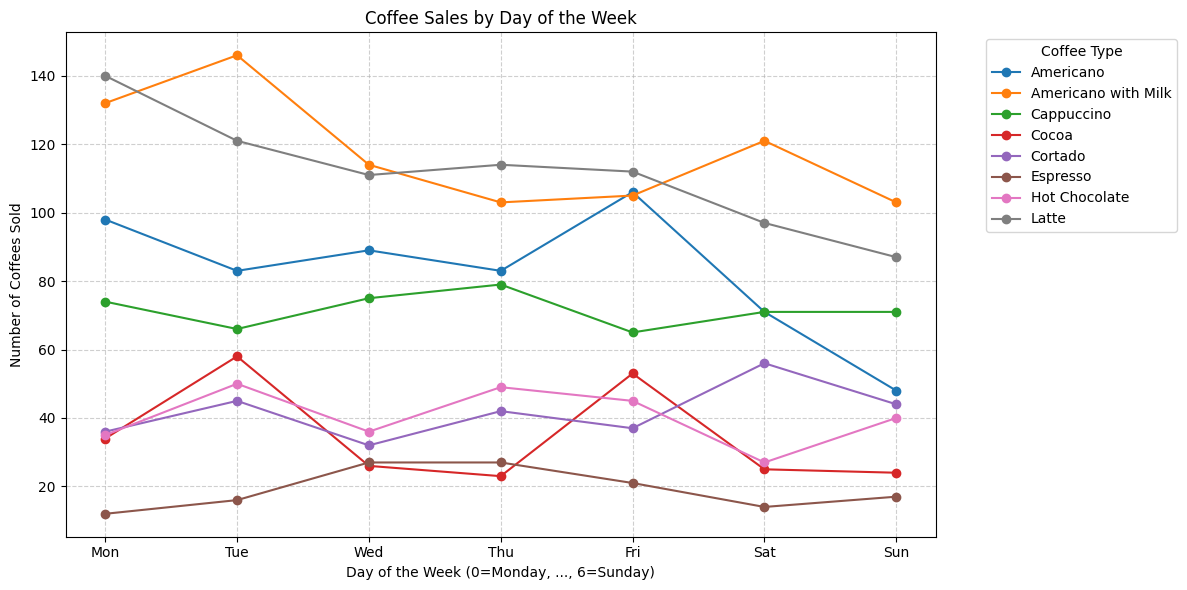

'The plot clearly shows the most ordered type of coffee on a certainday thus making it easy to identify the stock of the day.\nThis minimizes understocking and overstocking of a certain type of coffee'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring day_of_week is integer
final_data['day_of_week'] = final_data['day_of_week'].astype(int)

#  Grouping my data (by day_of_week and coffee_name),converting it into a table and checking the total number of sales.
grouped = final_data.groupby(['day_of_week', 'coffee_name']).size().unstack(fill_value=0)
grouped = grouped.sort_index()

plt.figure(figsize=(12, 6))

for coffee in grouped.columns:
    plt.plot(grouped.index, grouped[coffee], marker='o', label=coffee)

plt.title('Coffee Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, ..., 6=Sunday)')
plt.ylabel('Number of Coffees Sold')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


'''The plot clearly shows the most ordered type of coffee on a certainday thus making it easy to identify the stock of the day.
This minimizes understocking and overstocking of a certain type of coffee'''

C:\Users\laura\AppData\Local\Temp\ipykernel_3840\1630345944.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sales = final_data.groupby('season')['money'].sum().reset_index()


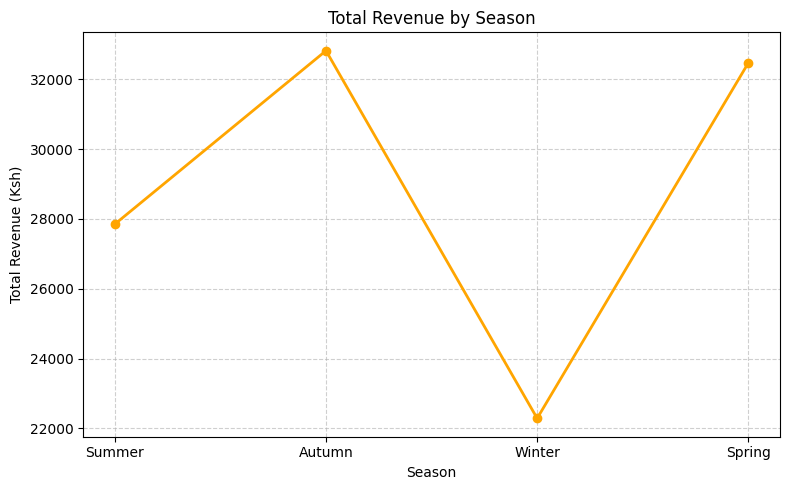

'fromthe plot,it is clear that more vevenue is earned in autumn and spring, thus staffing should be maximized on those seasons and minimized on otherwise\nThis will help in revenue allocation and save more money for other purposes'

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

final_data['season'] = final_data['season'].str.title() 
season_order = ['Summer', 'Autumn', 'Winter', 'Spring']
final_data['season'] = pd.Categorical(final_data['season'], categories=season_order, ordered=True)
seasonal_sales = final_data.groupby('season')['money'].sum().reset_index()


plt.figure(figsize=(8, 5))
plt.plot(seasonal_sales['season'], seasonal_sales['money'], marker='o', linestyle='-', color='orange', linewidth=2)

plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue (Ksh)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


'''fromthe plot,it is clear that more vevenue is earned in autumn and spring, thus staffing should be maximized on those seasons and minimized on otherwise
This will help in revenue allocation and save more money for other purposes'''

'The darker the colour, the busy the shop is, this helps in identifying peak hours for staffing'

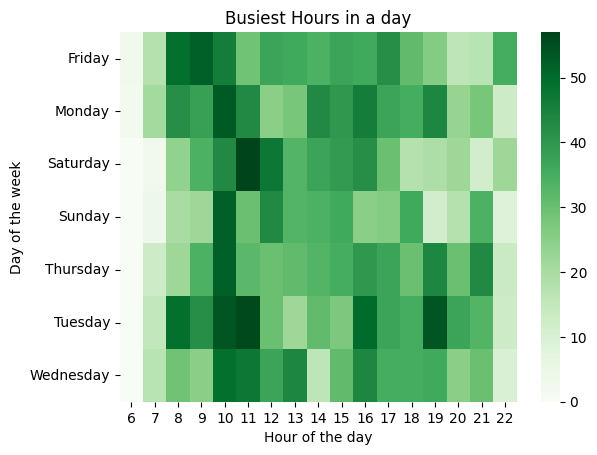

In [42]:
import seaborn as sns


pivot = final_data.groupby(['weekday_name', 'hour']).size().unstack(fill_value=0)
sns.heatmap(pivot, cmap='Greens', annot=False)
plt.title('Busiest Hours in a day')
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')


'''The darker the colour, the busy the shop is, this helps in identifying peak hours for staffing'''

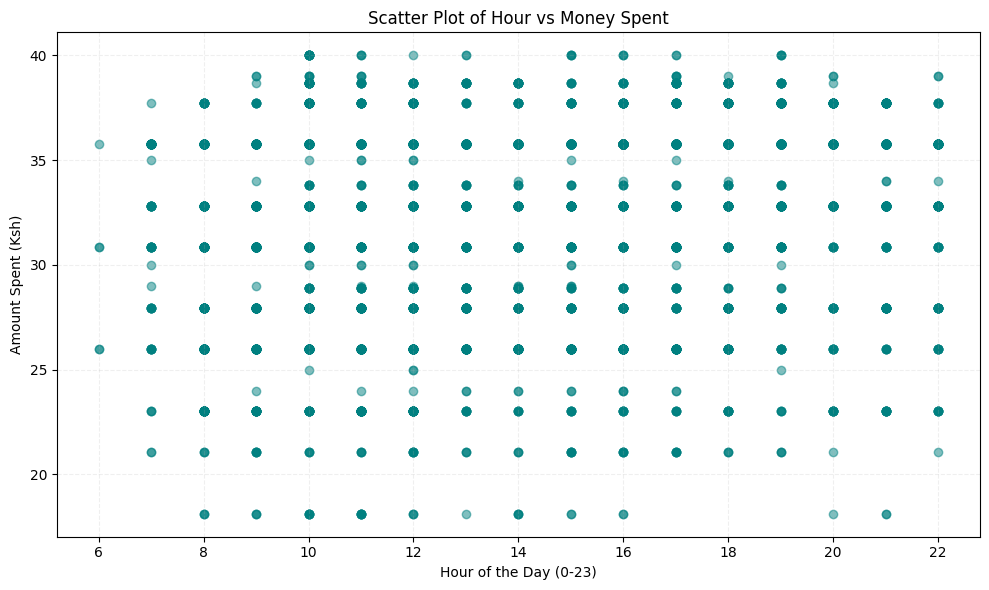

In [43]:
final_data['hour'] = final_data['hour'].astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(final_data['hour'], final_data['money'], alpha=0.5, color='teal')

plt.title('Scatter Plot of Hour vs Money Spent')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Amount Spent (Ksh)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


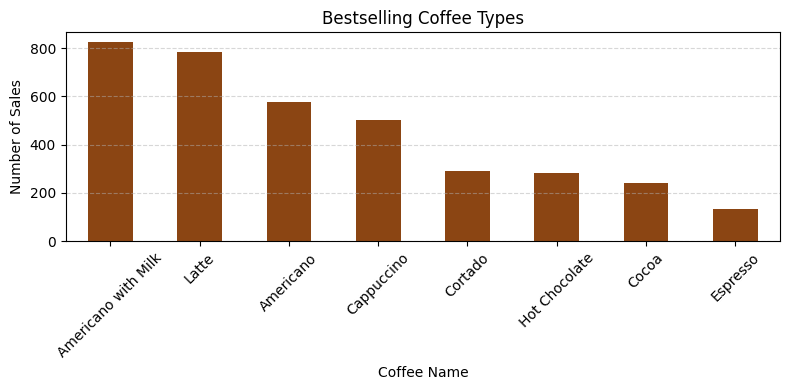

'Therefore the best selling coffetype is Americano with milk, closely followed by Latte!'

In [44]:
coffee_counts = final_data['coffee_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
coffee_counts.plot(kind='bar', color='saddlebrown')

plt.title('Bestselling Coffee Types')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


'''Therefore the best selling coffetype is Americano with milk, closely followed by Latte!'''

C:\Users\laura\AppData\Local\Temp\ipykernel_3840\3469455834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = final_data.groupby(['season', 'coffee_name']).size().unstack(fill_value=0)


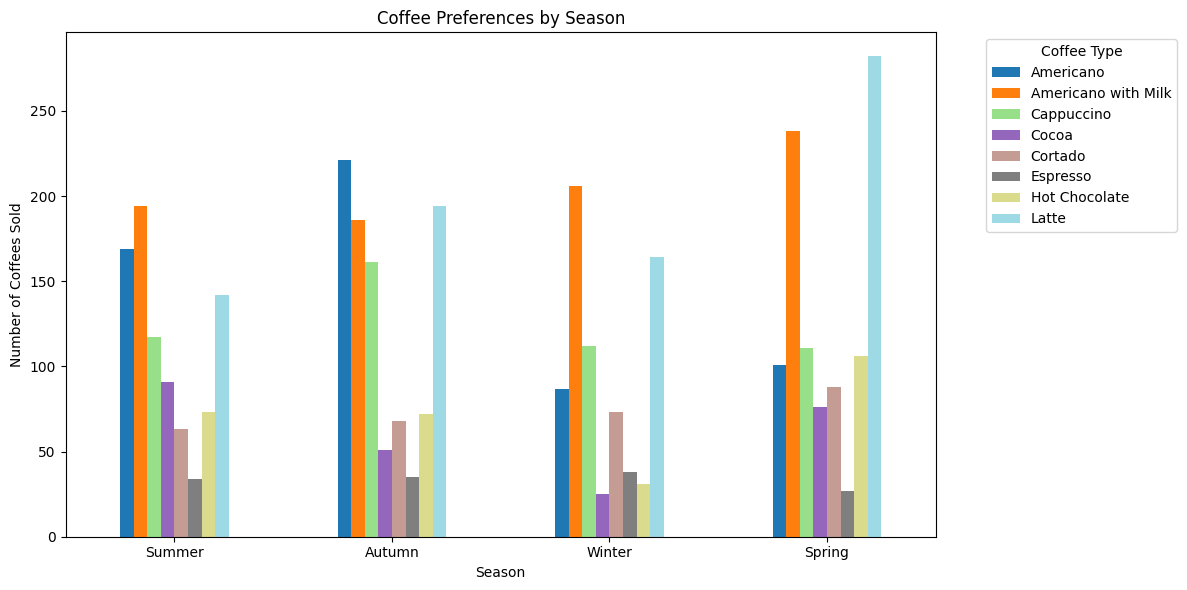

"'This helps us identify the certain type of coffee preferred  by season"

In [45]:
grouped = final_data.groupby(['season', 'coffee_name']).size().unstack(fill_value=0)

grouped.plot(kind='bar', figsize=(12, 6), colormap='tab20')

plt.title('Coffee Preferences by Season')
plt.xlabel('Season')
plt.ylabel('Number of Coffees Sold')
plt.xticks(rotation=0)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


''''This helps us identify the certain type of coffee preferred  by season'''

C:\Users\laura\AppData\Local\Temp\ipykernel_3840\3839269162.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = final_data.groupby(['weekday_name', 'coffee_name']).size().unstack(fill_value=0)


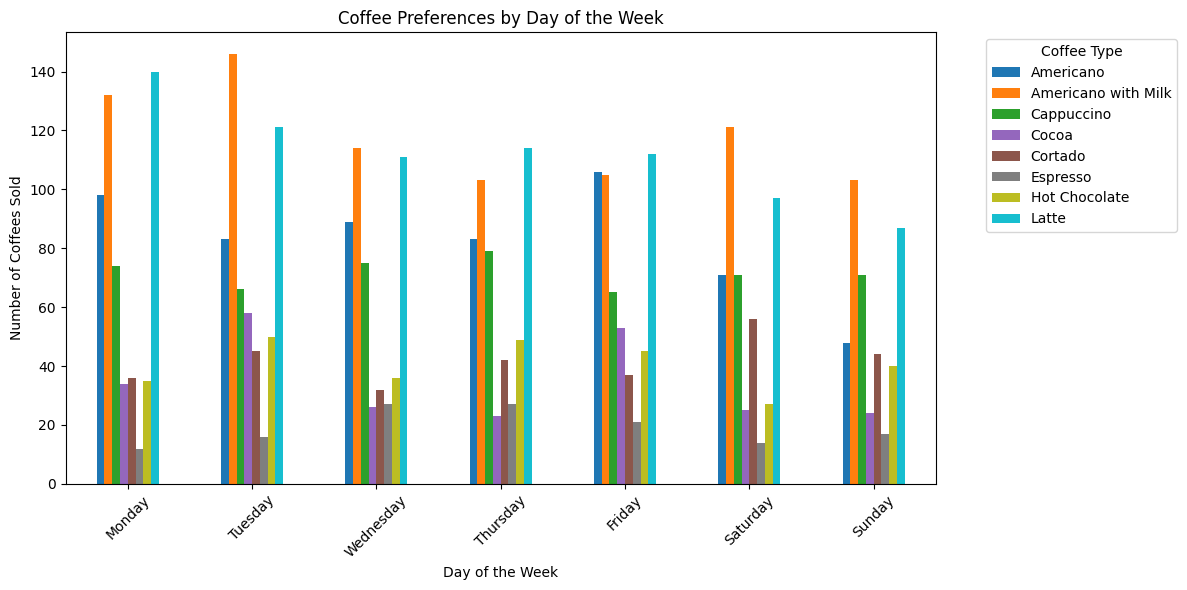

In [46]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
final_data['weekday_name'] = pd.Categorical(final_data['weekday_name'], categories=weekday_order, ordered=True)

grouped = final_data.groupby(['weekday_name', 'coffee_name']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(12, 6), colormap='tab10')

plt.title('Coffee Preferences by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Coffees Sold')
plt.xticks(rotation=45)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# MACHINE LEARNING

In [47]:
# I have used the whole dataset and didfeature engineering to ssolve various problems that can be solved as a result of analyzinf the dataset,
# Now i have to pass this step of machine learning and my main goal is to Idetify how much money can the coffee shop earn within a certain month in a certain season
# I thus change my dataset to get features and a reasonable target variable for my model,emhencing its accuracy


final_data['date'] = pd.to_datetime(final_data['date'])
final_data['year_month'] = final_data['date'].dt.to_period('M').astype(str)
monthly_data = final_data.groupby(['year_month', 'season'])['money'].sum().reset_index()
monthly_data.rename(columns={'money': 'monthly_revenue'}, inplace=True)

monthly_data.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_3840\3606651216.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = final_data.groupby(['year_month', 'season'])['money'].sum().reset_index()


,year_month,season,monthly_revenue
0,2024-03,Summer,0.0
1,2024-03,Autumn,7050.2
2,2024-03,Winter,0.0
3,2024-03,Spring,0.0
4,2024-04,Summer,0.0


In [48]:
monthly_data1=pd.get_dummies(monthly_data,columns=['season'],drop_first=True)
monthly_data1.head()

,year_month,monthly_revenue,season_Autumn,season_Winter,season_Spring
0,2024-03,0.0,False,False,False
1,2024-03,7050.2,True,False,False
2,2024-03,0.0,False,True,False
3,2024-03,0.0,False,False,True
4,2024-04,0.0,False,False,False


In [49]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()

enc2= enc.fit_transform(monthly_data['season'].values.reshape(-1,1)).toarray()
hot_enc= pd.DataFrame(enc2,columns=['None', 'Autumn','Winter','Spring'])
hot2= pd.concat([monthly_data,hot_enc],axis=1)
hot3= hot2.drop(columns=['season','None'],inplace=True)
hot2.head()

,year_month,monthly_revenue,Autumn,Winter,Spring
0,2024-03,0.0,0.0,1.0,0.0
1,2024-03,7050.2,0.0,0.0,0.0
2,2024-03,0.0,0.0,0.0,1.0
3,2024-03,0.0,1.0,0.0,0.0
4,2024-04,0.0,0.0,1.0,0.0


In [52]:
X = hot2.drop(columns=['monthly_revenue', 'year_month'])
y = hot2['monthly_revenue']                               


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.fit(X_test)


from sklearn.linear_model import LinearRegression
RFR= LinearRegression()
'''Fitting the model'''

model= RFR.fit(X_train,y_train)
model

X_train shape: (41, 3)
y_train shape: (41,)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred= model.predict(X_test)


from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


print("\n--- Regression Model Evaluation ---")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")



--- Regression Model Evaluation ---
MSE: 9833095.6396
RMSE: 3135.7767
MAE: 3079.3844
R-squared: -1.6343


In [64]:
from sklearn.svm import SVR

svr= SVR()
